# Importing Libraries
Import the necessary libraries, including NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn.


In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plotting
from sklearn.model_selection import train_test_split # splitting data
from sklearn.preprocessing import MinMaxScaler # scaling data
import category_encoders as ce # encoding categorical data
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.tree import DecisionTreeRegressor # decision tree
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # regression metrics
from sklearn.model_selection import GridSearchCV # hyperparameter tuning
import warnings # ignore warnings
warnings.filterwarnings('ignore')




# Loading the Dataset
Load the dataset using Pandas and display the first few rows.

In [2]:
# Load the dataset using Pandas
df=pd.read_csv('/Users/ry7vv/Documents/Coding_Project/PythonFile/ML/RealRental/dubai_properties.csv')


# Exploring the Dataset
Explore the dataset by displaying the last few rows, dataset information, and checking for missing values.

In [3]:
# Display the first 5 rows of the dataset
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
# Display the last 5 rows of the dataset
df.tail()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN
73741,"Al Rass, Umm Al Quwain",11000,0,1,Apartment,300,36.666667,Low,Yearly,Unfurnished,For Rent,2024-02-12,69,Al Rass,Umm Al Quwain,NaN,NaN


In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [6]:
# Check for missing values in the dataset
df.isna().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

# Handling Missing Values
Handle missing values by identifying categorical columns and displaying their value counts.

In [7]:
# Handling Missing Values

# Identify categorical columns
category_cols=df.select_dtypes(include='object').columns
category_cols


Index(['Address', 'Type', 'Rent_category', 'Frequency', 'Furnishing',
       'Purpose', 'Posted_date', 'Location', 'City'],
      dtype='object')

In [8]:
for var in category_cols:
    print(df[var].value_counts())
    print('\n\n\n\n')

Address
Khalifa City, Abu Dhabi                              2300
Mohammed Bin Zayed City, Abu Dhabi                   1293
Madinat Al Riyadh, Abu Dhabi                          767
Muwaileh 3 Building, Muwailih Commercial, Sharjah     762
Muwaileh Building, Muwailih Commercial, Sharjah       713
                                                     ... 
Building 188, Mogul, Discovery Gardens, Dubai           1
Maeen 1, Maeen, The Lakes, Dubai                        1
Acuna, DAMAC Hills 2 (Akoya by DAMAC), Dubai            1
Kappa Acca 3, Dubai South, Dubai                        1
Al Huboob 1, Al Salamah, Umm Al Quwain                  1
Name: count, Length: 4515, dtype: int64





Type
Apartment               56534
Villa                   12883
Townhouse                3421
Hotel Apartment           465
Penthouse                 270
Villa Compound            107
Residential Building       44
Residential Floor          12
Residential Plot            6
Name: count, dtype: int64





Ren

# Categorical Data Analysis
Analyze categorical data by plotting pie charts and count plots.

<Axes: ylabel='count'>

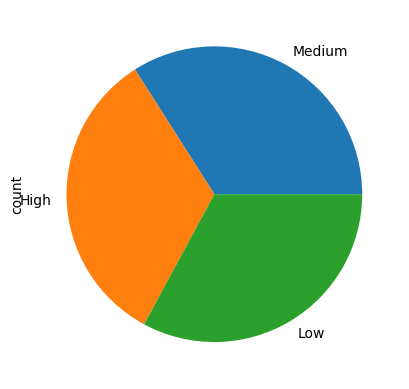

In [9]:
df["Rent_category"].value_counts().plot.pie()

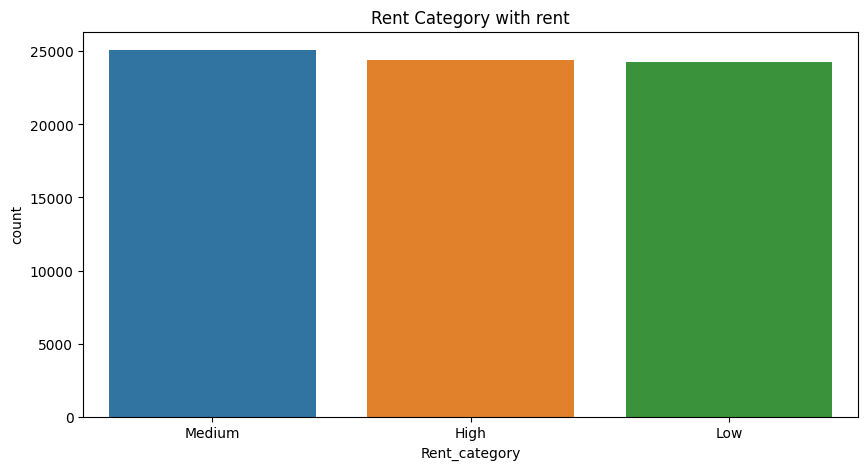

In [10]:
plt.figure(figsize=(10,5))
plt.title('Rent Category with rent')
sns.countplot(x='Rent_category', hue='Rent_category', data=df)
plt.show()

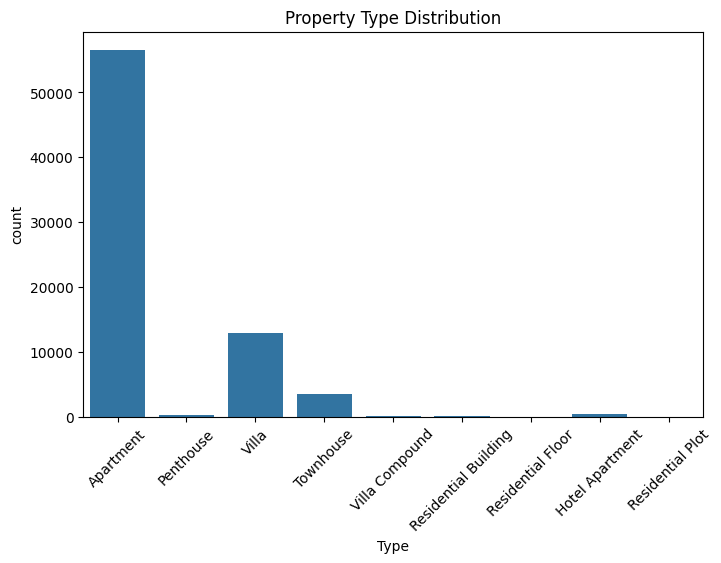

In [11]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Type')
plt.title('Property Type Distribution')
plt.xticks(rotation=45)
plt.show()

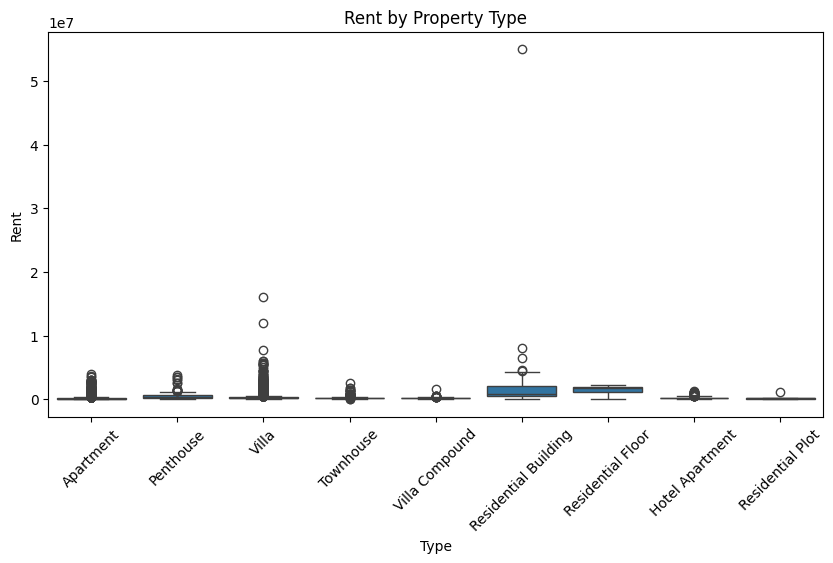

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Type', y='Rent')
plt.title('Rent by Property Type')
plt.xticks(rotation=45)
plt.show()

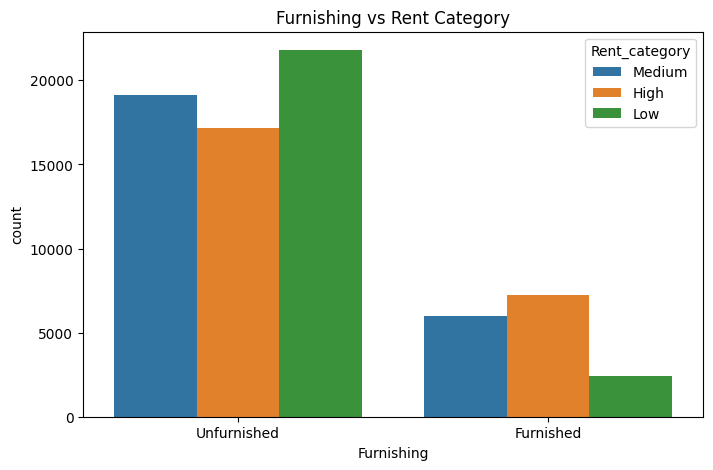

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Furnishing', hue='Rent_category')
plt.title('Furnishing vs Rent Category')
plt.show()

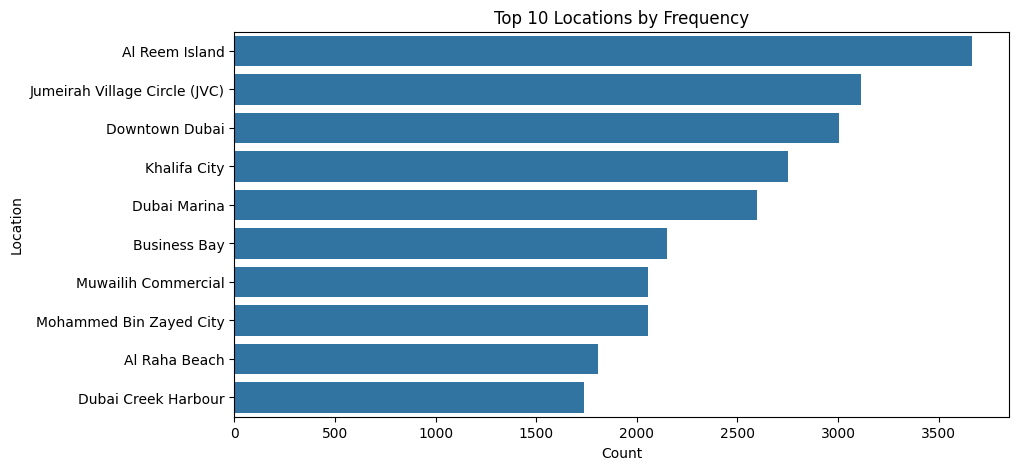

In [14]:
top_locations = df['Location'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations by Frequency')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

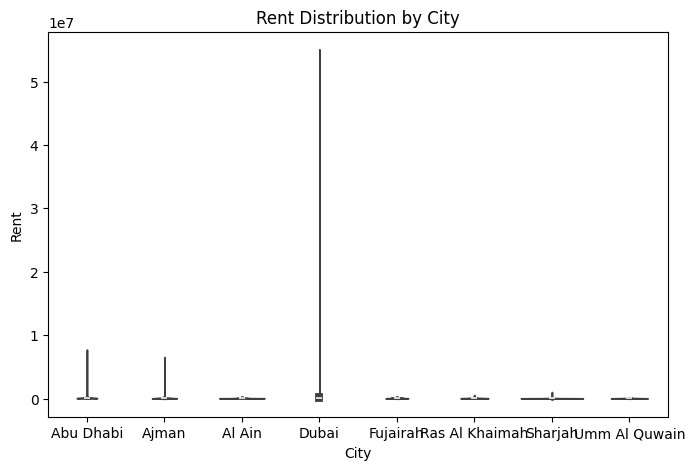

In [15]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='City', y='Rent')
plt.title('Rent Distribution by City')
plt.show()

In [16]:
df[category_cols].head()

,Address,Type,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Location,City
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",Apartment,Medium,Yearly,Unfurnished,For Rent,2024-03-07,Al Reem Island,Abu Dhabi
1,"Water's Edge, Yas Island, Abu Dhabi",Apartment,Medium,Yearly,Unfurnished,For Rent,2024-03-08,Yas Island,Abu Dhabi
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",Apartment,Medium,Yearly,Furnished,For Rent,2024-03-21,Al Raha Beach,Abu Dhabi
3,"Marina Heights, Marina Square, Al Reem Island,...",Penthouse,High,Yearly,Unfurnished,For Rent,2024-02-24,Al Reem Island,Abu Dhabi
4,"West Yas, Yas Island, Abu Dhabi",Villa,High,Yearly,Unfurnished,For Rent,2024-02-16,Yas Island,Abu Dhabi


In [17]:
df[category_cols].isnull().sum()

Address          0
Type             0
Rent_category    0
Frequency        0
Furnishing       0
Purpose          0
Posted_date      0
Location         0
City             0
dtype: int64

# Feature Engineering
Perform feature engineering by creating new features from existing ones and encoding categorical variables.

In [18]:
df.drop(['Frequency','Purpose','Address'],axis=1,inplace=True)

In [19]:

df['Posted_date']=pd.to_datetime(df['Posted_date'])
df['Year']=df['Posted_date'].dt.year
df['Month']=df['Posted_date'].dt.month
df['Day']=df['Posted_date'].dt.day
df.drop('Posted_date',axis=1,inplace=True)


In [20]:
#category_cols = ['Type','Furnishing', 'City']
pd.get_dummies(df.Type,drop_first=True).head()

,Hotel Apartment,Penthouse,Residential Building,Residential Floor,Residential Plot,Townhouse,Villa,Villa Compound
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False


In [21]:
pd.get_dummies(df.City,drop_first=True).head()

,Ajman,Al Ain,Dubai,Fujairah,Ras Al Khaimah,Sharjah,Umm Al Quwain
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [22]:
pd.get_dummies(df.Location,drop_first=True).head()

,Abu Krayyah,Abu Samrah,Abu Shagara,Address Fujairah Beach Resort,Airport Street,Ajman Downtown,Ajman Free Zone,Ajman Industrial,Ajman Marina,Ajman Uptown,...,Wadi Ammar,Wasit Suburb,Wasl Gate,World Trade Centre,Yas Island,Yasmin Village,Za'abeel,Zakhir,Zayed City,Zayed Sports City
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Numerical Data Analysis
Analyze numerical data by displaying descriptive statistics and plotting histograms and box plots.

In [23]:
num_cols=df.select_dtypes(include='number').columns

In [24]:
df[num_cols].isna().sum()

Rent                        0
Beds                        0
Baths                       0
Area_in_sqft                0
Rent_per_sqft               0
Age_of_listing_in_days      0
Latitude                  719
Longitude                 719
Year                        0
Month                       0
Day                         0
dtype: int64

In [25]:
df[num_cols].head()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day
0,124000,3,4,1785,69.467787,45,24.493598,54.407841,2024,3,7
1,140000,3,4,1422,98.452883,44,24.494022,54.607372,2024,3,8
2,99000,2,3,1314,75.342466,31,24.485931,54.600939,2024,3,21
3,220000,3,4,3843,57.246942,57,24.493598,54.407841,2024,2,24
4,350000,5,7,6860,51.020408,65,24.494022,54.607372,2024,2,16


In [26]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    73742 non-null  int64  
 1   Beds                    73742 non-null  int64  
 2   Baths                   73742 non-null  int64  
 3   Area_in_sqft            73742 non-null  int64  
 4   Rent_per_sqft           73742 non-null  float64
 5   Age_of_listing_in_days  73742 non-null  int64  
 6   Latitude                73023 non-null  float64
 7   Longitude               73023 non-null  float64
 8   Year                    73742 non-null  int32  
 9   Month                   73742 non-null  int32  
 10  Day                     73742 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 5.3 MB


In [27]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Rent,73742.0,147925.001668,306965.830103,0.000000,54999.000000,98000.000000,170000.000000,5.500000e+07
Beds,73742.0,2.162811,1.578155,0.000000,1.000000,2.000000,3.000000,1.200000e+01
Baths,73742.0,2.650213,1.632997,1.000000,2.000000,2.000000,3.000000,1.100000e+01
Area_in_sqft,73742.0,2054.053552,3003.919252,74.000000,850.000000,1334.000000,2130.000000,2.102540e+05
Rent_per_sqft,73742.0,88.057754,66.534400,0.000000,39.977778,71.428571,118.483412,2.182045e+03
Age_of_listing_in_days,73742.0,74.261547,72.346767,11.000000,30.000000,52.000000,95.000000,2.276000e+03
Latitude,73023.0,24.918929,0.569356,15.175847,24.493598,25.078641,25.197978,2.592031e+01
Longitude,73023.0,55.053133,0.653722,43.351928,54.607372,55.238209,55.367138,5.636129e+01
Year,73742.0,2023.799707,0.413718,2018.000000,2024.000000,2024.000000,2024.000000,2.024000e+03
Month,73742.0,4.146592,3.286510,1.000000,2.000000,3.000000,4.000000,1.200000e+01


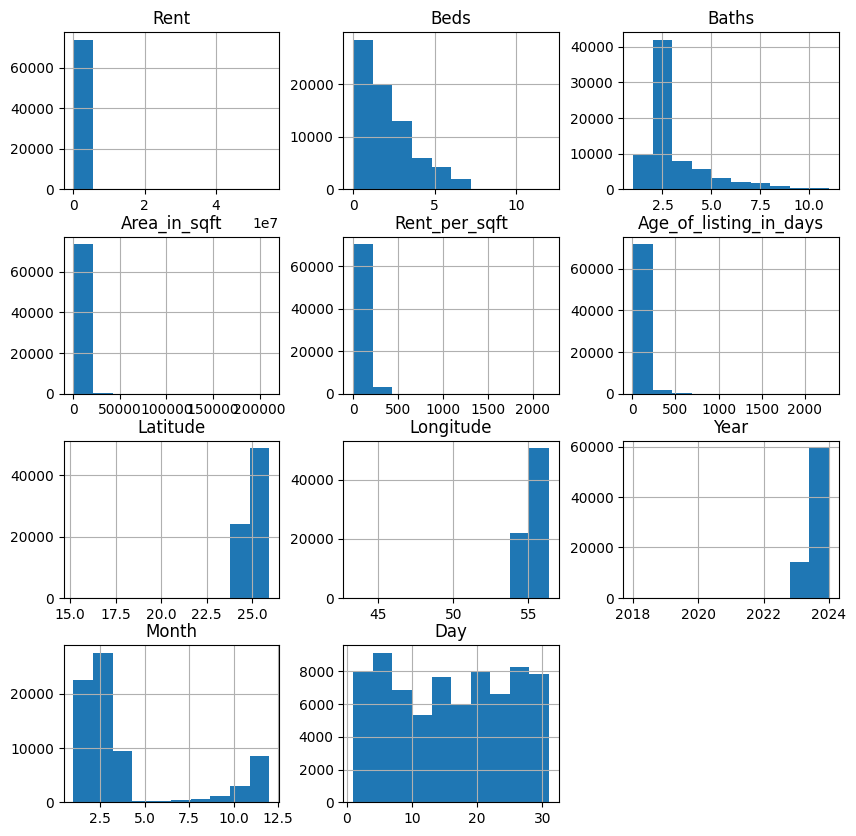

In [28]:
df[num_cols].hist(figsize=(10,10))
plt.show()

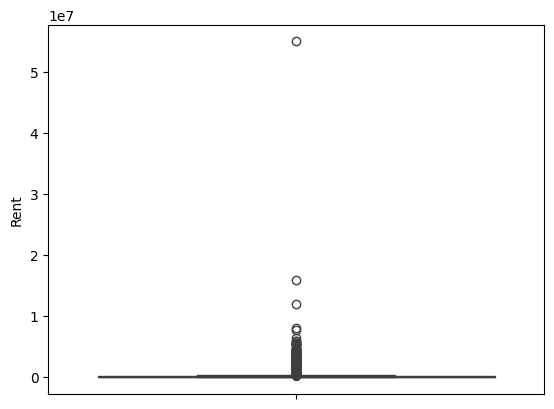

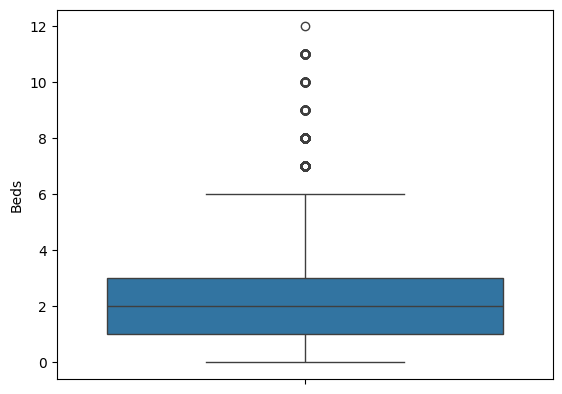

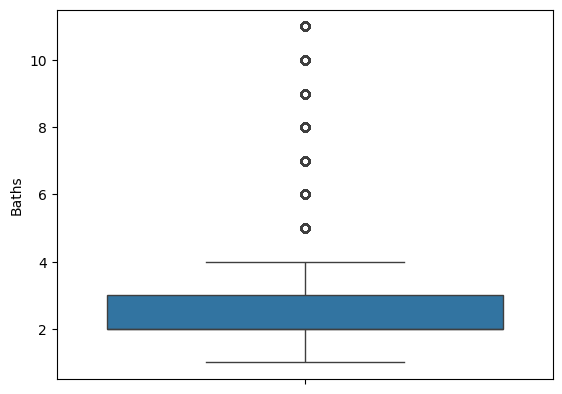

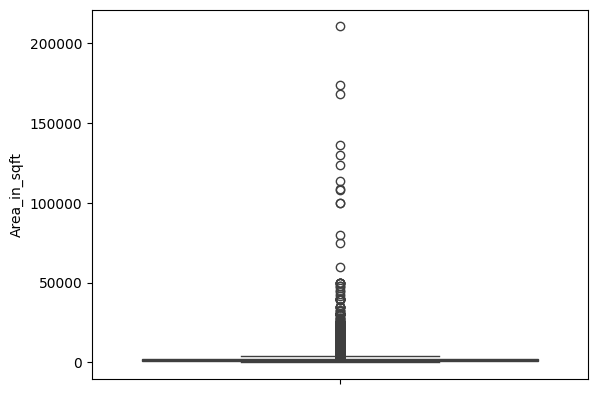

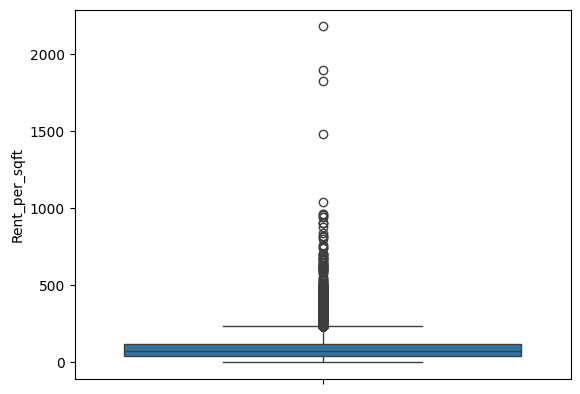

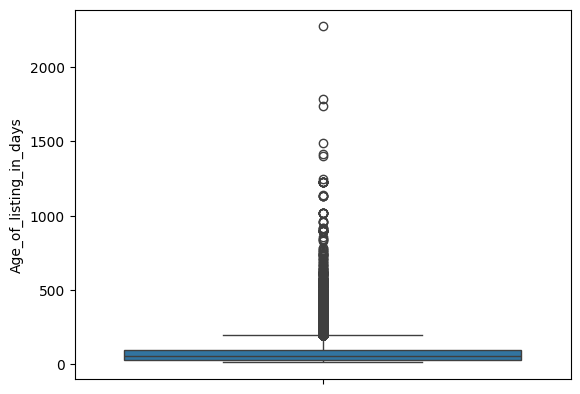

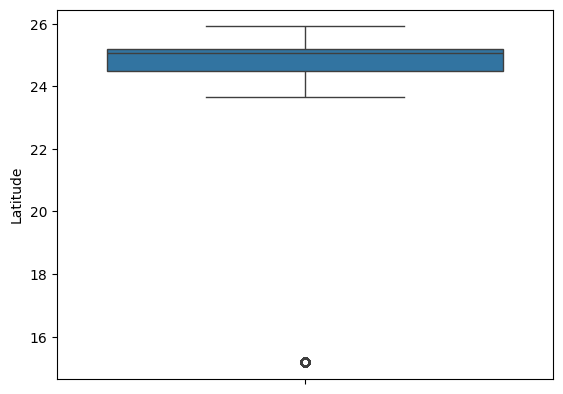

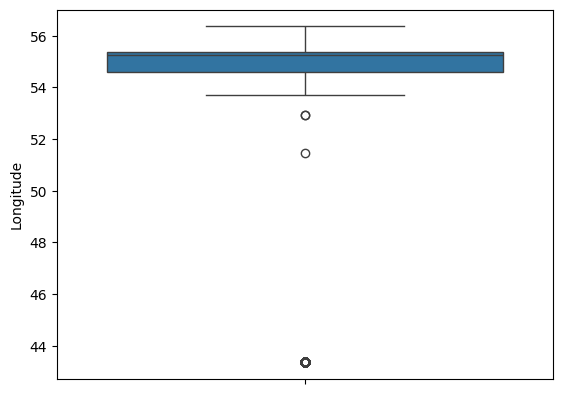

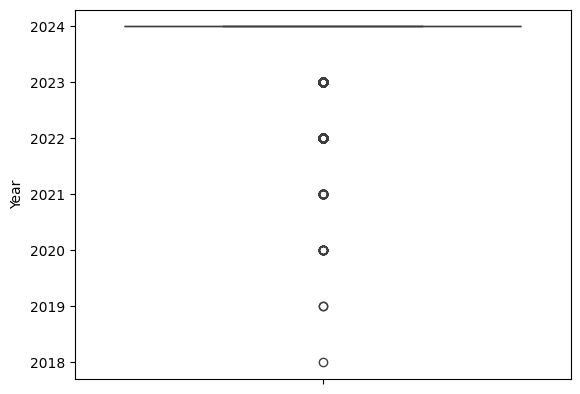

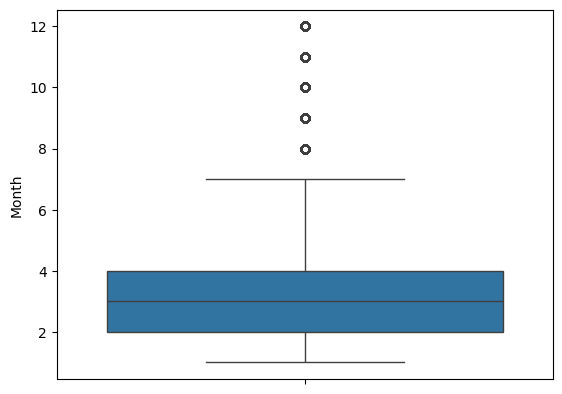

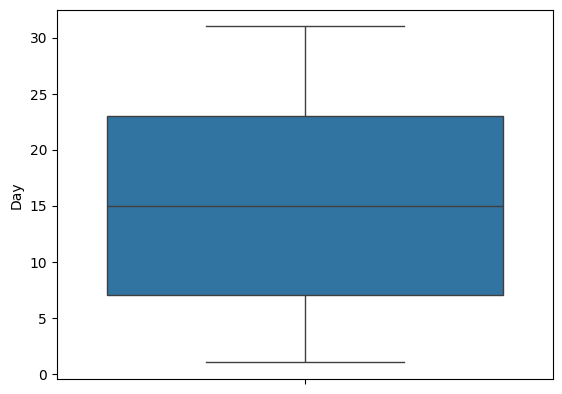

In [29]:
for var in num_cols:
    sns.boxplot(df[var])
    plt.show()


In [30]:
num_cols

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day'],
      dtype='object')

# Outlier Detection
Detect outliers in numerical columns using the Interquartile Range (IQR) method.


In [31]:
IQR=df.Rent.quantile(0.75)-df.Rent.quantile(0.25)
lower_fence=df.Rent.quantile(0.25)-(IQR*3)
upper_fence=df.Rent.quantile(0.75)+(IQR*3)
print('Rent outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Rent outliers are values < -290004.0 or > 515003.0


In [32]:
IQR=df.Area_in_sqft.quantile(0.75)-df.Area_in_sqft.quantile(0.25)
lower_fence=df.Area_in_sqft.quantile(0.25)-(IQR*3)
upper_fence=df.Area_in_sqft.quantile(0.75)+(IQR*3)
print('Area_in_sqft outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Area_in_sqft outliers are values < -2990.0 or > 5970.0


In [33]:
IQR=df.Beds.quantile(0.75)-df.Beds.quantile(0.25)
lower_fence=df.Beds.quantile(0.25)-(IQR*3)
upper_fence=df.Beds.quantile(0.75)+(IQR*3)
print('Beds outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Beds outliers are values < -5.0 or > 9.0


In [34]:
IQR=df.Baths.quantile(0.75)-df.Baths.quantile(0.25)
lower_fence=df.Baths.quantile(0.25)-(IQR*3)
upper_fence=df.Baths.quantile(0.75)+(IQR*3)
print('Baths outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Baths outliers are values < -1.0 or > 6.0


In [35]:
IQR=df.Rent_per_sqft.quantile(0.75)-df.Rent_per_sqft.quantile(0.25)
lower_fence=df.Rent_per_sqft.quantile(0.25)-(IQR*3)
upper_fence=df.Rent_per_sqft.quantile(0.75)+(IQR*3)
print('Rent_per_sqft outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Rent_per_sqft outliers are values < -195.5391258557135 or > 354.00031595576615


In [36]:
IQR=df.Age_of_listing_in_days.quantile(0.75)-df.Age_of_listing_in_days.quantile(0.25)
lower_fence=df.Age_of_listing_in_days.quantile(0.25)-(IQR*3)
upper_fence=df.Age_of_listing_in_days.quantile(0.75)+(IQR*3)
print('Age_of_listing_in_days outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Age_of_listing_in_days outliers are values < -165.0 or > 290.0


In [37]:
IQR=df.Latitude.quantile(0.75)-df.Latitude.quantile(0.25)
lower_fence=df.Latitude.quantile(0.25)-(IQR*3)
upper_fence=df.Latitude.quantile(0.75)+(IQR*3)
print('Latitude outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Latitude outliers are values < 22.380459600000002 or > 27.311116799999997


In [38]:
IQR=df.Longitude.quantile(0.75)-df.Longitude.quantile(0.25)
lower_fence=df.Longitude.quantile(0.25)-(IQR*3)
upper_fence=df.Longitude.quantile(0.75)+(IQR*3)
print('Longitude outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Longitude outliers are values < 52.32807497381102 or > 57.64643493491864


In [39]:
IQR=df.Year.quantile(0.75)-df.Year.quantile(0.25)
lower_fence=df.Year.quantile(0.25)-(IQR*3)
upper_fence=df.Year.quantile(0.75)+(IQR*3)
print('Year outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Year outliers are values < 2024.0 or > 2024.0


In [40]:
IQR=df.Month.quantile(0.75)-df.Month.quantile(0.25)
lower_fence=df.Month.quantile(0.25)-(IQR*3)
upper_fence=df.Month.quantile(0.75)+(IQR*3)
print('Month outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))


Month outliers are values < -4.0 or > 10.0


In [41]:
df

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City,Latitude,Longitude,Year,Month,Day
0,124000,3,4,Apartment,1785,69.467787,Medium,Unfurnished,45,Al Reem Island,Abu Dhabi,24.493598,54.407841,2024,3,7
1,140000,3,4,Apartment,1422,98.452883,Medium,Unfurnished,44,Yas Island,Abu Dhabi,24.494022,54.607372,2024,3,8
2,99000,2,3,Apartment,1314,75.342466,Medium,Furnished,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939,2024,3,21
3,220000,3,4,Penthouse,3843,57.246942,High,Unfurnished,57,Al Reem Island,Abu Dhabi,24.493598,54.407841,2024,2,24
4,350000,5,7,Villa,6860,51.020408,High,Unfurnished,65,Yas Island,Abu Dhabi,24.494022,54.607372,2024,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,14000,0,1,Apartment,419,33.412888,Low,Unfurnished,129,Al Salamah,Umm Al Quwain,25.493412,55.575994,2023,12,14
73738,14000,0,1,Apartment,500,28.000000,Low,Unfurnished,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527,2023,12,14
73739,50000,3,4,Apartment,2000,25.000000,Low,Unfurnished,110,King Faisal Street,Umm Al Quwain,NaN,NaN,2024,1,2
73740,37000,1,2,Apartment,989,37.411527,Low,Unfurnished,181,Al Maqtaa,Umm Al Quwain,NaN,NaN,2023,10,23


# Splitting the Data
Split the data into training and testing sets using Scikit-learn's train_test_split function.

In [42]:
X=df.drop('Rent',axis=1)
y=df['Rent']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
y_train.value_counts()

Rent
120000     1353
75000      1314
150000     1303
110000     1239
85000      1169
           ... 
245995        1
159980        1
499998        1
2550000       1
55200         1
Name: count, Length: 1904, dtype: int64

In [45]:
X_train.shape, X_test.shape

((58993, 15), (14749, 15))

In [46]:
X_train.dtypes

Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Furnishing                 object
Age_of_listing_in_days      int64
Location                   object
City                       object
Latitude                  float64
Longitude                 float64
Year                        int32
Month                       int32
Day                         int32
dtype: object

# Handling Missing Values in Train/Test Sets
Handle missing values in the training and testing sets by filling them with the median value.

In [47]:
categorical=[col for col in X_train.columns if X_train[col].dtypes=='O']
print(categorical)

numerical=[col for col in X_train.columns if X_train[col].dtypes!='O']
print(numerical)

['Type', 'Rent_category', 'Furnishing', 'Location', 'City']
['Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Year', 'Month', 'Day']


In [48]:
X_train[numerical].isna().sum()

Beds                        0
Baths                       0
Area_in_sqft                0
Rent_per_sqft               0
Age_of_listing_in_days      0
Latitude                  572
Longitude                 572
Year                        0
Month                       0
Day                         0
dtype: int64

In [49]:
X_test[numerical].isnull().sum()

Beds                        0
Baths                       0
Area_in_sqft                0
Rent_per_sqft               0
Age_of_listing_in_days      0
Latitude                  147
Longitude                 147
Year                        0
Month                       0
Day                         0
dtype: int64

In [50]:
for df1 in [X_train,X_test]:
    for var in numerical:
        col_median=X_train[var].median()
        df1[var].fillna(col_median,inplace=True)

In [51]:
X_train[numerical].isna().sum()

Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Year                      0
Month                     0
Day                       0
dtype: int64

In [52]:
X_test[numerical].isna().sum()

Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Year                      0
Month                     0
Day                       0
dtype: int64

In [53]:
X_train[categorical].isna().sum()

Type             0
Rent_category    0
Furnishing       0
Location         0
City             0
dtype: int64

In [54]:
X_test[categorical].isna().sum()

Type             0
Rent_category    0
Furnishing       0
Location         0
City             0
dtype: int64

# Handling Outliers in Train/Test Sets
Handle outliers in the training and testing sets by capping them at a specified threshold.

In [55]:
def max_value(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

for df1 in [X_train, X_test]:
    df1['Rent_per_sqft'] = max_value(df1, 'Rent_per_sqft', 354.00031595576615)
    df1['Age_of_listing_in_days'] = max_value(df1, 'Age_of_listing_in_days', 290.0)
    df1['Latitude'] = max_value(df1, 'Latitude', 27.311116799999997)
    df1['Longitude'] = max_value(df1, 'Longitude', 57.64643493491864)
    df1['Year'] = max_value(df1, 'Year', 2024.0)
    df1['Beds'] = max_value(df1, 'Beds', 9.0)
    df1['Baths'] = max_value(df1, 'Baths', 6.0)
    df1['Area_in_sqft'] = max_value(df1, 'Area_in_sqft', 5970.0)
    df1['Month'] = max_value(df1, 'Month', 10.0)

y_train = max_value(y_train.to_frame(), 'Rent', 515003.0).squeeze()
y_test = max_value(y_test.to_frame(), 'Rent', 515003.0).squeeze()

In [56]:
X_train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,58993.0,2.161494,1.561930,0.000000,1.000000,2.000000,3.000000,9.000000
Baths,58993.0,2.561067,1.350347,1.000000,2.000000,2.000000,3.000000,6.000000
Area_in_sqft,58993.0,1819.058634,1459.127599,74.000000,850.000000,1334.000000,2140.000000,5970.000000
Rent_per_sqft,58993.0,87.408993,61.953700,0.000000,40.000000,71.428571,118.518148,354.000316
Age_of_listing_in_days,58993.0,72.215195,59.722449,11.000000,30.000000,52.000000,95.000000,290.000000
Latitude,58993.0,24.920026,0.562408,15.175847,24.493598,25.078641,25.197978,25.920310
Longitude,58993.0,55.053919,0.645238,43.351928,54.607372,55.223830,55.360380,56.361294
Year,58993.0,2023.800197,0.413445,2018.000000,2024.000000,2024.000000,2024.000000,2024.000000
Month,58993.0,3.963199,2.888416,1.000000,2.000000,3.000000,4.000000,10.000000
Day,58993.0,15.467276,8.977053,1.000000,7.000000,15.000000,23.000000,31.000000


In [57]:
categorical

['Type', 'Rent_category', 'Furnishing', 'Location', 'City']

In [58]:
X_train[categorical].head()

,Type,Rent_category,Furnishing,Location,City
15517,Apartment,Low,Unfurnished,Al Reem Island,Abu Dhabi
58037,Apartment,Medium,Unfurnished,Discovery Gardens,Dubai
55267,Apartment,High,Unfurnished,Bluewaters Island,Dubai
34555,Villa,High,Unfurnished,Jumeirah Park,Dubai
12241,Apartment,Low,Unfurnished,Al Reem Island,Abu Dhabi


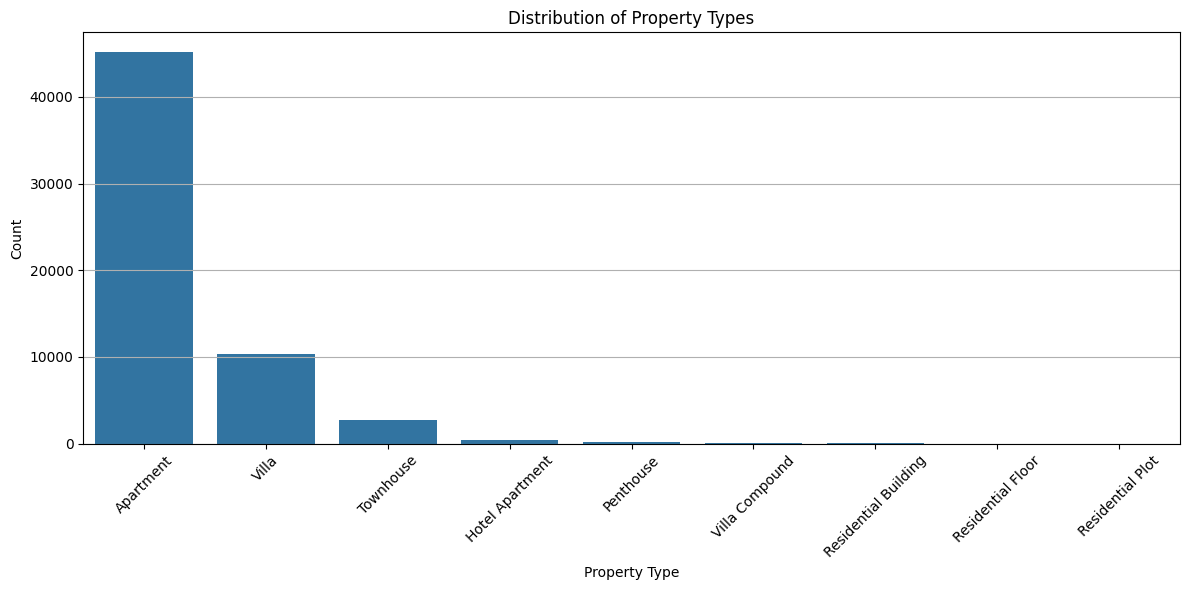

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(data=X_train, x='Type', order=X_train['Type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

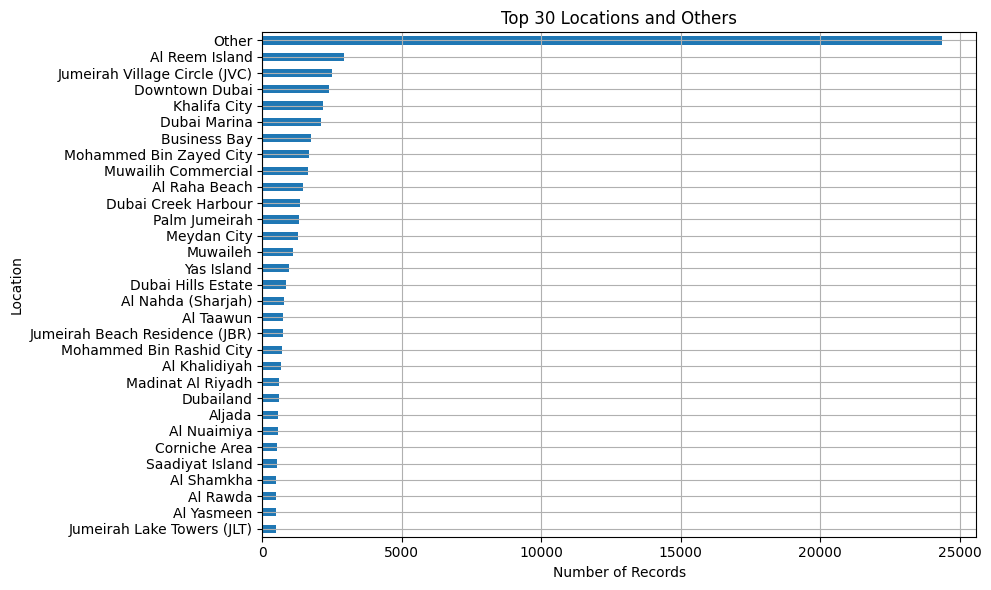

In [60]:
top_n = 30
loc_counts = X_train['Location'].value_counts()

top_locations = loc_counts[:top_n]
other_count = loc_counts[top_n:].sum()

plot_data = top_locations.copy()
plot_data['Other'] = other_count


plt.figure(figsize=(10, 6))
plot_data.sort_values().plot(kind='barh')
plt.title('Top 30 Locations and Others')
plt.xlabel('Number of Records')
plt.tight_layout()
plt.grid(True)
plt.show()

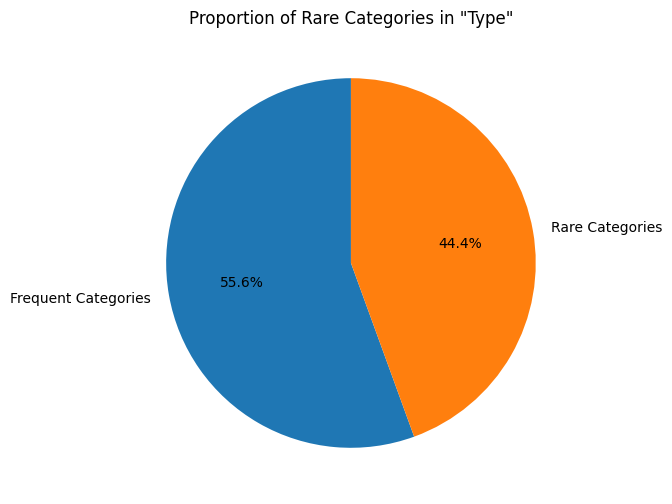

In [61]:
rare_threshold = 100
rare_count = sum(X_train['Type'].value_counts() < rare_threshold)
total_count = len(X_train['Type'].unique())

labels = ['Frequent Categories', 'Rare Categories']
sizes = [total_count - rare_count, rare_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Rare Categories in "Type"')
plt.show()

In [62]:
type_counts = X_train['Type'].value_counts()
rare_types = type_counts[type_counts < 100].index
X_train['Type'] = X_train['Type'].replace(rare_types, 'Other')
X_test['Type'] = X_test['Type'].replace(rare_types, 'Other')

top_locations = X_train['Location'].value_counts().nlargest(50).index
X_train['Location'] = X_train['Location'].apply(lambda x: x if x in top_locations else 'Other')
X_test['Location'] = X_test['Location'].apply(lambda x: x if x in top_locations else 'Other')

city_counts = X_train['City'].value_counts()
rare_cities = city_counts[city_counts < 100].index
X_train['City'] = X_train['City'].replace(rare_cities, 'Other')
X_test['City'] = X_test['City'].replace(rare_cities, 'Other')

# Encoding Categorical Variables
Encode categorical variables using BinaryEncoder and OrdinalEncoder.

In [63]:
encoderB=ce.BinaryEncoder(cols=['Furnishing'])
X_train=encoderB.fit_transform(X_train)
X_test=encoderB.transform(X_test)

encoderU=ce.OrdinalEncoder(cols=['Rent_category'])
X_train=encoderU.fit_transform(X_train)
X_test=encoderU.transform(X_test)

In [64]:
X_train.head()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing_0,Furnishing_1,Age_of_listing_in_days,Location,City,Latitude,Longitude,Year,Month,Day
15517,0.0,1.0,Apartment,556.0,80.935252,1,0,1,109.0,Al Reem Island,Abu Dhabi,24.493598,54.407841,2024.0,1.0,3
58037,2.0,2.0,Apartment,1450.0,58.620690,2,0,1,12.0,Other,Dubai,25.038271,55.145696,2024.0,4.0,9
55267,2.0,2.0,Apartment,1501.0,306.462358,3,0,1,88.0,Other,Dubai,25.082916,55.122156,2024.0,1.0,24
34555,4.0,2.0,Villa,4500.0,117.777778,3,0,1,17.0,Other,Dubai,25.046941,55.154818,2024.0,4.0,4
12241,2.0,3.0,Apartment,1350.0,48.148148,1,0,1,127.0,Al Reem Island,Abu Dhabi,24.493598,54.407841,2023.0,10.0,16


In [65]:
X_train = pd.concat([X_train[numerical], X_train[['Furnishing_0', 'Furnishing_1']],
                     pd.get_dummies(X_train.Type, prefix='Type'),
                     pd.get_dummies(X_train.City, prefix='City'),
                     pd.get_dummies(X_train.Location, prefix='Location')], axis=1)

In [66]:
X_train.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Other,Location_Palm Jumeirah,Location_Saadiyat Island,Location_Shakhbout City,Location_Sobha Hartland,Location_Tourist Club Area (TCA),Location_Town Square,Location_Umm Suqeim,Location_Yas Island,Location_Za'abeel
15517,0.0,1.0,556.0,80.935252,109.0,24.493598,54.407841,2024.0,1.0,3,...,False,False,False,False,False,False,False,False,False,False
58037,2.0,2.0,1450.0,58.620690,12.0,25.038271,55.145696,2024.0,4.0,9,...,True,False,False,False,False,False,False,False,False,False
55267,2.0,2.0,1501.0,306.462358,88.0,25.082916,55.122156,2024.0,1.0,24,...,True,False,False,False,False,False,False,False,False,False
34555,4.0,2.0,4500.0,117.777778,17.0,25.046941,55.154818,2024.0,4.0,4,...,True,False,False,False,False,False,False,False,False,False
12241,2.0,3.0,1350.0,48.148148,127.0,24.493598,54.407841,2023.0,10.0,16,...,False,False,False,False,False,False,False,False,False,False


In [67]:
X_train.shape

(58993, 76)

In [68]:

X_test = pd.concat([X_test[numerical], X_test[['Furnishing_0', 'Furnishing_1']],
                    pd.get_dummies(X_test.Type, prefix='Type'),
                    pd.get_dummies(X_test.City, prefix='City'),
                    pd.get_dummies(X_test.Location, prefix='Location')], axis=1)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [69]:
X_test.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Other,Location_Palm Jumeirah,Location_Saadiyat Island,Location_Shakhbout City,Location_Sobha Hartland,Location_Tourist Club Area (TCA),Location_Town Square,Location_Umm Suqeim,Location_Yas Island,Location_Za'abeel
72919,0.0,1.0,330.0,42.424242,37.0,25.300001,55.441618,2024.0,3.0,15,...,False,False,False,False,False,False,False,False,False,False
34194,1.0,2.0,767.0,78.224250,17.0,25.118441,55.387147,2024.0,4.0,4,...,False,False,False,False,False,False,False,False,False,False
51325,2.0,2.0,1187.0,185.341196,44.0,25.164059,55.285661,2024.0,3.0,8,...,False,False,False,False,False,False,False,False,False,False
51427,2.0,2.0,1102.0,226.860254,149.0,25.197978,55.360380,2023.0,10.0,24,...,False,False,False,False,False,False,False,False,False,False
19695,3.0,4.0,1496.0,80.213904,25.0,24.494022,54.607372,2024.0,3.0,27,...,False,False,False,False,False,False,False,False,True,False


In [70]:
cols=X_train.columns

# Scaling Numerical Features
Scale numerical features using MinMaxScaler.

In [71]:

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [72]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [73]:
X_train_scaled.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Other,Location_Palm Jumeirah,Location_Saadiyat Island,Location_Shakhbout City,Location_Sobha Hartland,Location_Tourist Club Area (TCA),Location_Town Square,Location_Umm Suqeim,Location_Yas Island,Location_Za'abeel
0,0.000000,0.0,0.081750,0.228630,0.351254,0.867214,0.849843,1.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.222222,0.2,0.233379,0.165595,0.003584,0.917908,0.906560,1.000000,0.333333,0.266667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.2,0.242028,0.865712,0.275986,0.922063,0.904750,1.000000,0.000000,0.766667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.444444,0.2,0.750678,0.332705,0.021505,0.918715,0.907261,1.000000,0.333333,0.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.222222,0.4,0.216418,0.136012,0.415771,0.867214,0.849843,0.833333,1.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
X_train_scaled.tail()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Other,Location_Palm Jumeirah,Location_Saadiyat Island,Location_Shakhbout City,Location_Sobha Hartland,Location_Tourist Club Area (TCA),Location_Town Square,Location_Umm Suqeim,Location_Yas Island,Location_Za'abeel
58988,0.333333,0.6,0.291384,0.315274,0.118280,0.867254,0.865180,1.0,0.222222,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58989,0.111111,0.2,0.148236,0.178788,0.082437,0.919552,0.911308,1.0,0.222222,0.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58990,0.111111,0.2,0.128223,0.510516,0.121864,0.921665,0.905757,1.0,0.222222,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58991,0.333333,0.2,0.365502,0.329503,0.129032,0.921587,0.905752,1.0,0.222222,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58992,0.111111,0.0,0.140095,0.147520,0.078853,0.941932,0.929351,1.0,0.222222,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,58993.0,0.240166,0.173548,0.0,0.111111,0.222222,0.333333,1.0
Baths,58993.0,0.312213,0.270069,0.0,0.200000,0.200000,0.400000,1.0
Area_in_sqft,58993.0,0.295973,0.247478,0.0,0.131615,0.213704,0.350407,1.0
Rent_per_sqft,58993.0,0.246918,0.175010,0.0,0.112994,0.201775,0.334797,1.0
Age_of_listing_in_days,58993.0,0.219409,0.214059,0.0,0.068100,0.146953,0.301075,1.0
...,...,...,...,...,...,...,...,...
Location_Tourist Club Area (TCA),58993.0,0.006289,0.079053,0.0,0.000000,0.000000,0.000000,1.0
Location_Town Square,58993.0,0.008204,0.090206,0.0,0.000000,0.000000,0.000000,1.0
Location_Umm Suqeim,58993.0,0.005357,0.072993,0.0,0.000000,0.000000,0.000000,1.0
Location_Yas Island,58993.0,0.016121,0.125940,0.0,0.000000,0.000000,0.000000,1.0


In [76]:
X_train_scaled[:5]

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Other,Location_Palm Jumeirah,Location_Saadiyat Island,Location_Shakhbout City,Location_Sobha Hartland,Location_Tourist Club Area (TCA),Location_Town Square,Location_Umm Suqeim,Location_Yas Island,Location_Za'abeel
0,0.000000,0.0,0.081750,0.228630,0.351254,0.867214,0.849843,1.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.222222,0.2,0.233379,0.165595,0.003584,0.917908,0.906560,1.000000,0.333333,0.266667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.2,0.242028,0.865712,0.275986,0.922063,0.904750,1.000000,0.000000,0.766667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.444444,0.2,0.750678,0.332705,0.021505,0.918715,0.907261,1.000000,0.333333,0.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.222222,0.4,0.216418,0.136012,0.415771,0.867214,0.849843,0.833333,1.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y_train[:5]

array([ 45000.,  85000., 460000., 515003.,  65000.])

Rent_per_sqft                              0.288127
Area_in_sqft                               0.272006
City_Dubai                                 0.160089
Beds                                       0.125812
Type_Apartment                             0.071430
City_Abu Dhabi                             0.019255
Baths                                      0.017326
Type_Townhouse                             0.005022
Location_Saadiyat Island                   0.004554
Latitude                                   0.004356
Longitude                                  0.003975
Location_Palm Jumeirah                     0.002837
Location_Yas Island                        0.002199
Location_Other                             0.002091
Type_Villa                                 0.002081
Location_Downtown Dubai                    0.001872
Day                                        0.001408
Age_of_listing_in_days                     0.001309
Furnishing_1                               0.001242
Furnishing_0

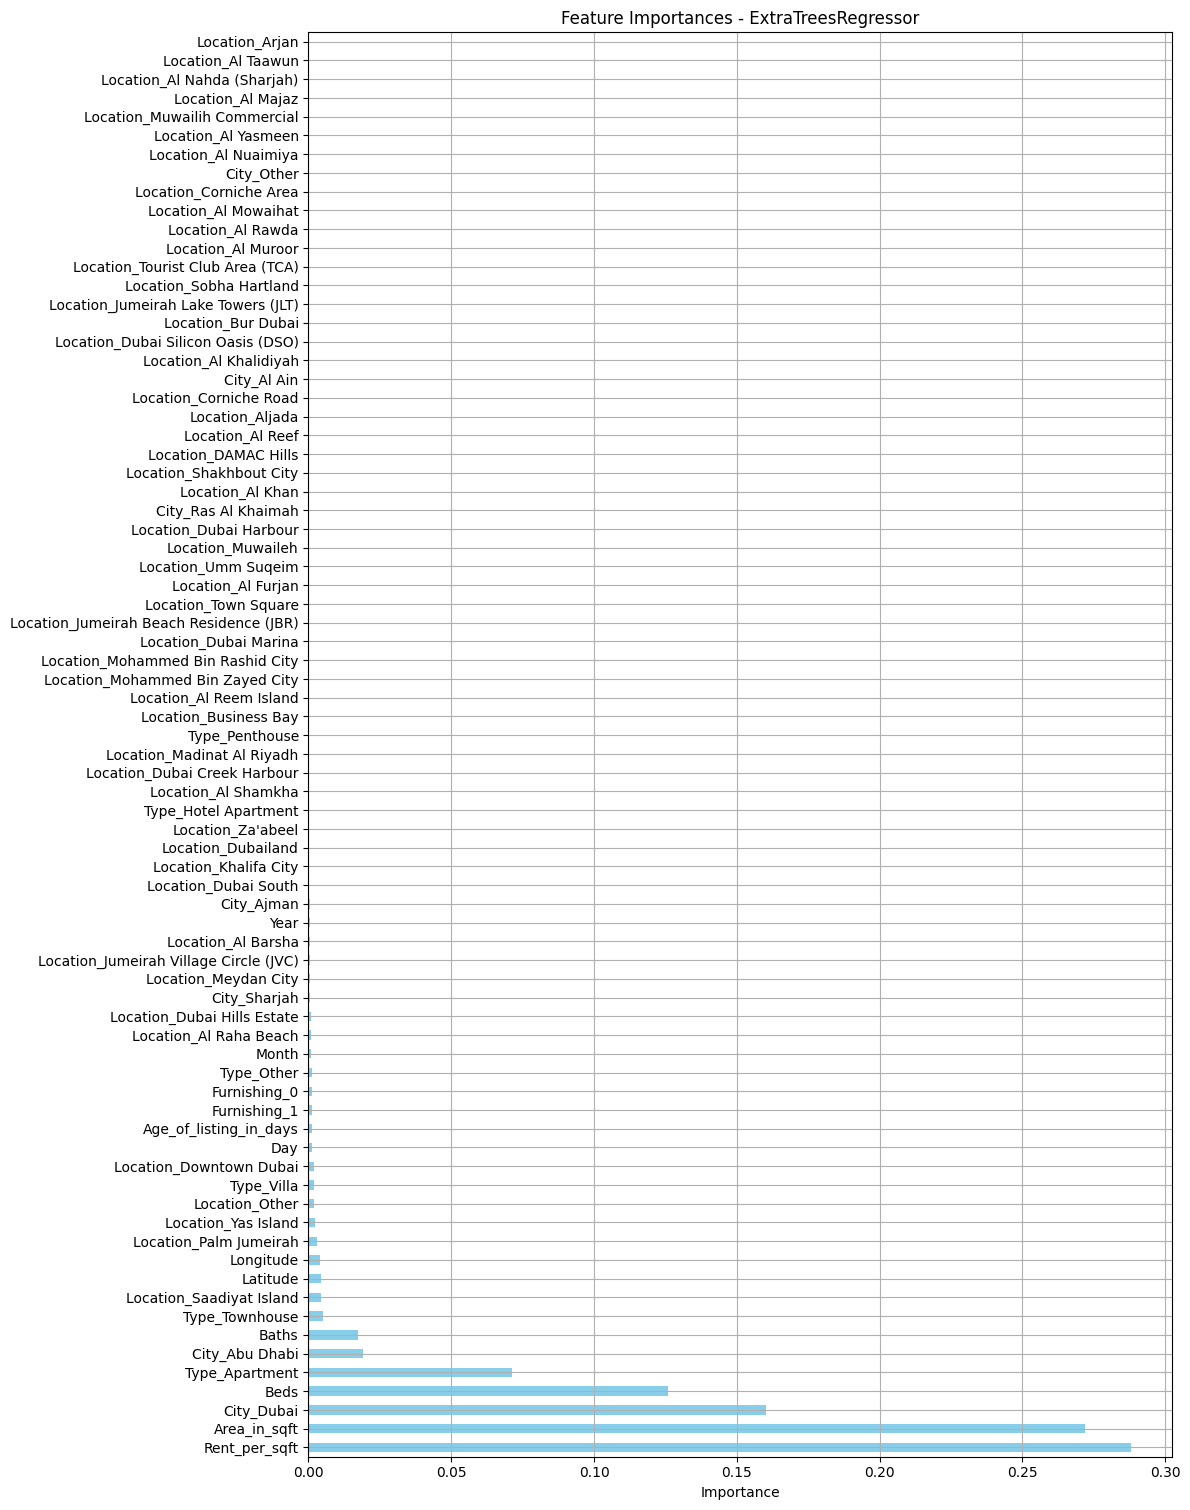

In [78]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train_scaled, y_train)

et_importances = pd.Series(et_model.feature_importances_, index=X_train.columns)
et_importances = et_importances.sort_values(ascending=False)

# عرض النتائج بالكامل
pd.set_option('display.max_rows', None)
display(et_importances)

# رسم بياني لكل الميزات
plt.figure(figsize=(12, max(6, len(et_importances) * 0.2)))
et_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importances - ExtraTreesRegressor')
plt.xlabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

Area_in_sqft                               26816.247033
Beds                                       25810.123904
Rent_per_sqft                              21926.690632
Type_Apartment                             12756.741148
City_Dubai                                 12209.394693
Type_Villa                                  9613.244523
City_Sharjah                                5544.365793
Location_Downtown Dubai                     2772.462310
Baths                                       2678.228565
Location_Palm Jumeirah                      2647.063150
Furnishing_0                                2345.397934
Furnishing_1                                2345.397934
City_Ajman                                  1461.051402
Location_Muwailih Commercial                1445.247330
Location_Jumeirah Beach Residence (JBR)     1023.082888
City_Abu Dhabi                               865.098217
Type_Townhouse                               705.306663
Location_Umm Suqeim                          683

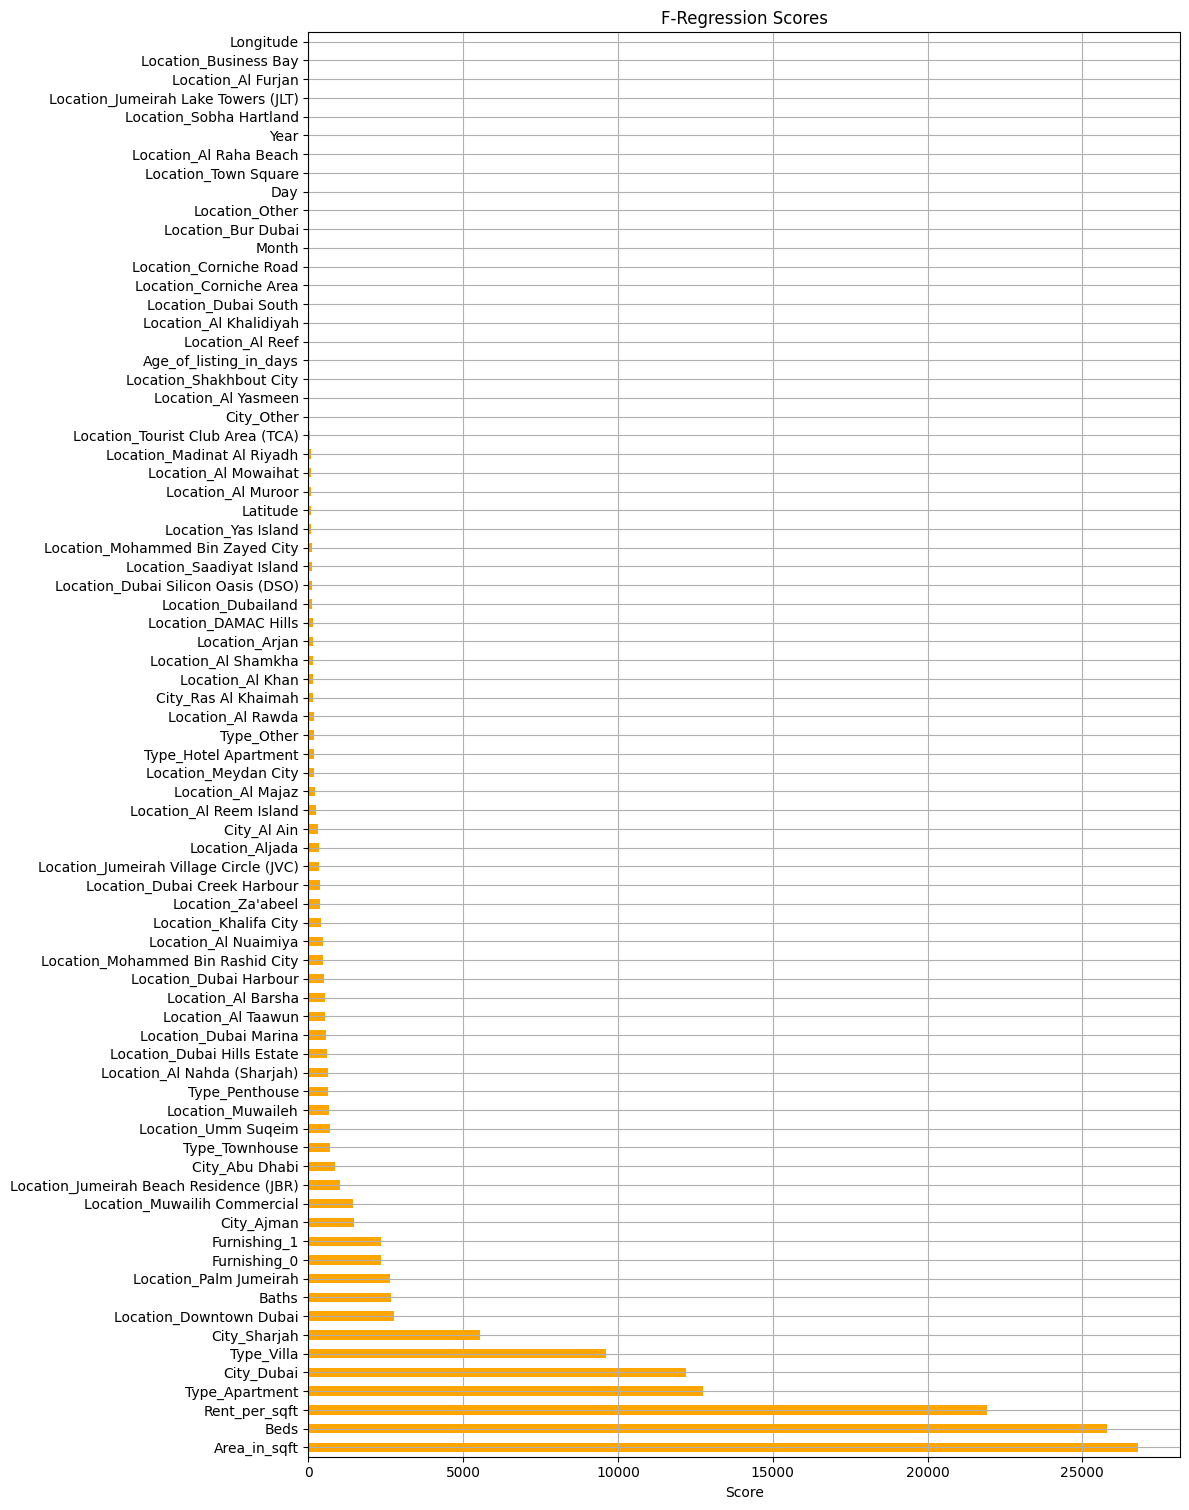

In [79]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_scaled, y_train)

f_scores = pd.Series(selector.scores_, index=X_train.columns)
f_scores = f_scores.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
display(f_scores)

plt.figure(figsize=(12, max(6, len(f_scores) * 0.2)))
f_scores.plot(kind='barh', color='orange')
plt.title('F-Regression Scores')
plt.xlabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
for k in range(10, 70, 5):
    top_et = set(et_importances.nlargest(k).index)
    top_freg = set(f_scores.nlargest(k).index)
    agreed = top_et.intersection(top_freg)
    print(f"k = {k} → {len(agreed)} common features")

k = 10 → 6 common features
k = 15 → 8 common features
k = 20 → 13 common features
k = 25 → 15 common features
k = 30 → 17 common features
k = 35 → 20 common features
k = 40 → 25 common features
k = 45 → 30 common features
k = 50 → 37 common features
k = 55 → 42 common features
k = 60 → 48 common features
k = 65 → 54 common features


In [85]:
top_k = 50  
top_et = set(et_importances.nlargest(top_k).index)
top_freg = set(f_scores.nlargest(top_k).index)

agreed_features = top_et.intersection(top_freg)
print(f"✅ Found {len(agreed_features)} common features:")
print(sorted(agreed_features))

✅ Found 37 common features:
['Area_in_sqft', 'Baths', 'Beds', 'City_Abu Dhabi', 'City_Ajman', 'City_Dubai', 'City_Sharjah', 'Furnishing_0', 'Furnishing_1', 'Location_Al Barsha', 'Location_Al Reem Island', 'Location_Al Shamkha', 'Location_Downtown Dubai', 'Location_Dubai Creek Harbour', 'Location_Dubai Harbour', 'Location_Dubai Hills Estate', 'Location_Dubai Marina', 'Location_Dubailand', 'Location_Jumeirah Beach Residence (JBR)', 'Location_Jumeirah Village Circle (JVC)', 'Location_Khalifa City', 'Location_Meydan City', 'Location_Mohammed Bin Rashid City', 'Location_Mohammed Bin Zayed City', 'Location_Muwaileh', 'Location_Palm Jumeirah', 'Location_Saadiyat Island', 'Location_Umm Suqeim', 'Location_Yas Island', "Location_Za'abeel", 'Rent_per_sqft', 'Type_Apartment', 'Type_Hotel Apartment', 'Type_Other', 'Type_Penthouse', 'Type_Townhouse', 'Type_Villa']


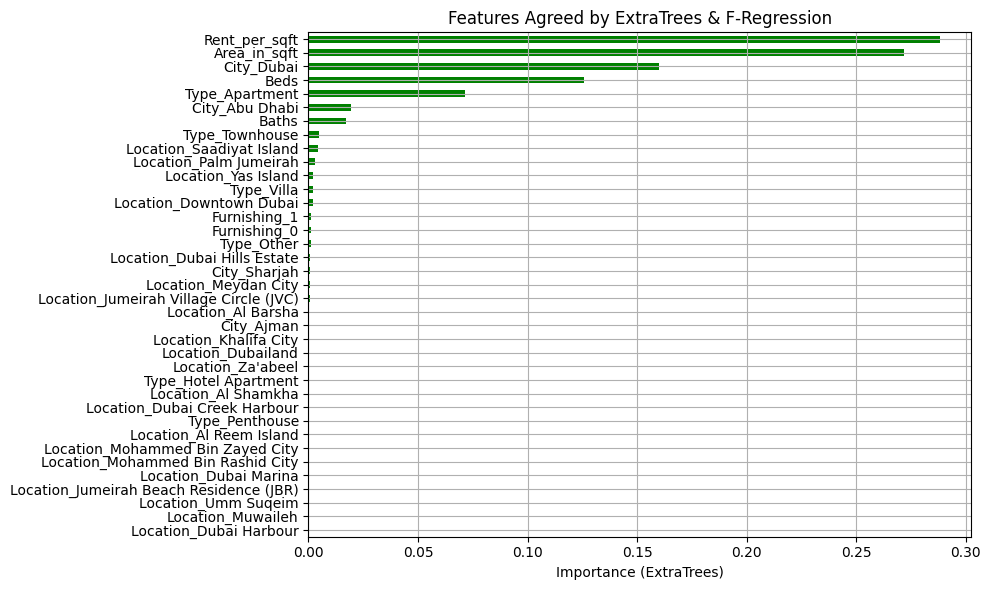

In [86]:
agreed_scores = et_importances[list(agreed_features)]

plt.figure(figsize=(10, 6))
agreed_scores.sort_values().plot(kind='barh', color='green')
plt.title('Features Agreed by ExtraTrees & F-Regression')
plt.xlabel('Importance (ExtraTrees)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
X_train_agreed = X_train_scaled[list(agreed_features)]
X_test_agreed = X_test_scaled[list(agreed_features)]

print("✅ New shapes:")
print("X_train_agreed:", X_train_agreed.shape)
print("X_test_agreed:", X_test_agreed.shape)

✅ New shapes:
X_train_agreed: (58993, 37)
X_test_agreed: (14749, 37)


# Model Training and Evaluation
Train and evaluate different models, including Linear Regression, Decision Tree, and Random Forest, and compare their performance.

In [88]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging': BaggingRegressor(estimator=DecisionTreeRegressor(), n_jobs=-1),
    'XGBoost': XGBRegressor()
}

params = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1]
    },
    'Bagging': {
        'n_estimators': [50, 100]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7, 10]
    }
}

# 4. تشغيل GridSearch
best_models = {}

for model_name, model in models.items():
    print(f"\n🔍 Processing Model: {model_name}...")
    grid = GridSearchCV(estimator=model,
                        param_grid=params.get(model_name, {}),
                        cv=cv,
                        scoring='r2',
                        n_jobs=-1,
                        verbose=1)

    grid.fit(X_train_agreed, y_train)
    best_models[model_name] = {
        'Best Estimator': grid.best_estimator_,
        'Best Parameters': grid.best_params_,
        'Best Score': grid.best_score_
    }

    print(f"{model_name} ✅")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Best R² Score (CV): {grid.best_score_:.4f}")


🔍 Processing Model: Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Linear Regression ✅
Best Parameters: {}
Best R² Score (CV): 0.8494

🔍 Processing Model: Ridge Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Ridge Regression ✅
Best Parameters: {'alpha': 1.0}
Best R² Score (CV): 0.8494

🔍 Processing Model: Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest ✅
Best Parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Best R² Score (CV): 0.9892

🔍 Processing Model: Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree ✅
Best Parameters: {'max_depth': 15, 'min_samples_split': 5}
Best R² Score (CV): 0.9852

🔍 Processing Model: Gradient Boosting...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Gradient Boosting ✅
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Best R² Score (CV): 0.9893

🔍 

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

for name, model_dict in best_models.items():
    model = model_dict['Best Estimator']

    model.fit(X_train_agreed, y_train)

    train_pred = model.predict(X_train_agreed)
    test_pred = model.predict(X_test_agreed)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    print(f"\n🔹 {name}")
    print(f"Train R²: {train_r2:.4f} | RMSE: {train_rmse:.2f} | MAE: {train_mae:.2f} | MSE: {train_mse:.2f}")
    print(f"Test  R²: {test_r2:.4f} | RMSE: {test_rmse:.2f} | MAE: {test_mae:.2f} | MSE: {test_mse:.2f}")
    print("-" * 60)


🔹 Linear Regression
Train R²: 0.8498 | RMSE: 42961.22 | MAE: 28917.72 | MSE: 1845666304.51
Test  R²: 0.8546 | RMSE: 42645.41 | MAE: 28723.43 | MSE: 1818631329.27
------------------------------------------------------------

🔹 Ridge Regression
Train R²: 0.8498 | RMSE: 42961.31 | MAE: 28914.62 | MSE: 1845674541.99
Test  R²: 0.8546 | RMSE: 42645.32 | MAE: 28719.16 | MSE: 1818623147.52
------------------------------------------------------------

🔹 Random Forest
Train R²: 0.9953 | RMSE: 7592.05 | MAE: 1359.16 | MSE: 57639274.90
Test  R²: 0.9899 | RMSE: 11259.87 | MAE: 2051.89 | MSE: 126784737.64
------------------------------------------------------------

🔹 Decision Tree
Train R²: 0.9947 | RMSE: 8053.57 | MAE: 1336.82 | MSE: 64859984.08
Test  R²: 0.9864 | RMSE: 13048.93 | MAE: 2509.08 | MSE: 170274499.20
------------------------------------------------------------

🔹 Gradient Boosting
Train R²: 0.9939 | RMSE: 8667.54 | MAE: 2437.54 | MSE: 75126165.01
Test  R²: 0.9897 | RMSE: 11341.02 | M

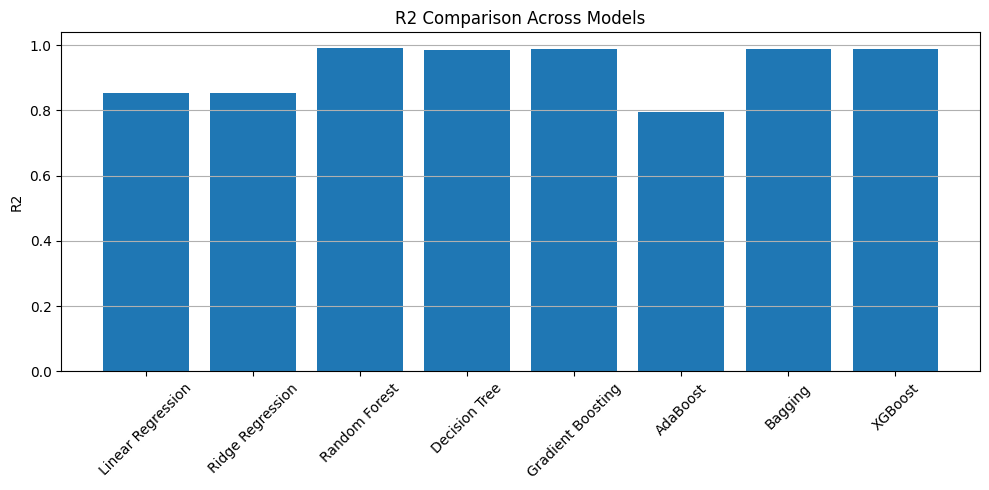

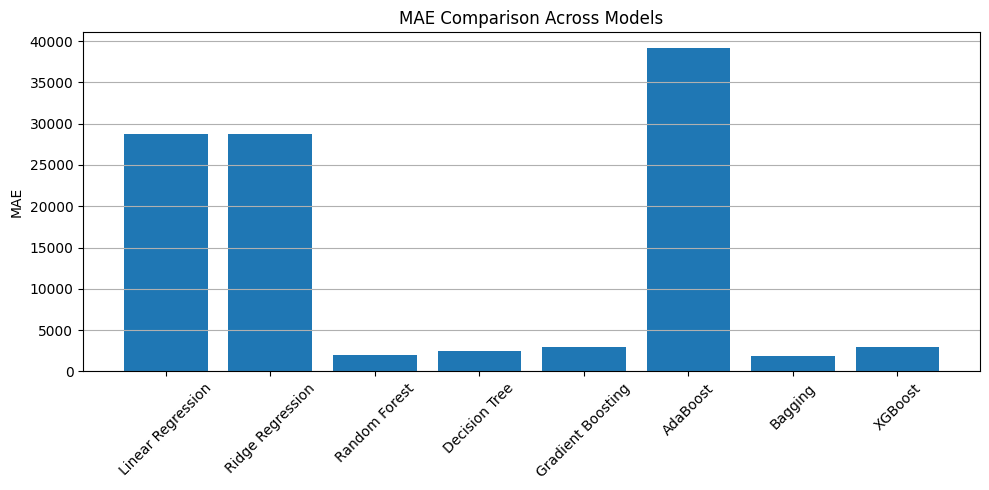

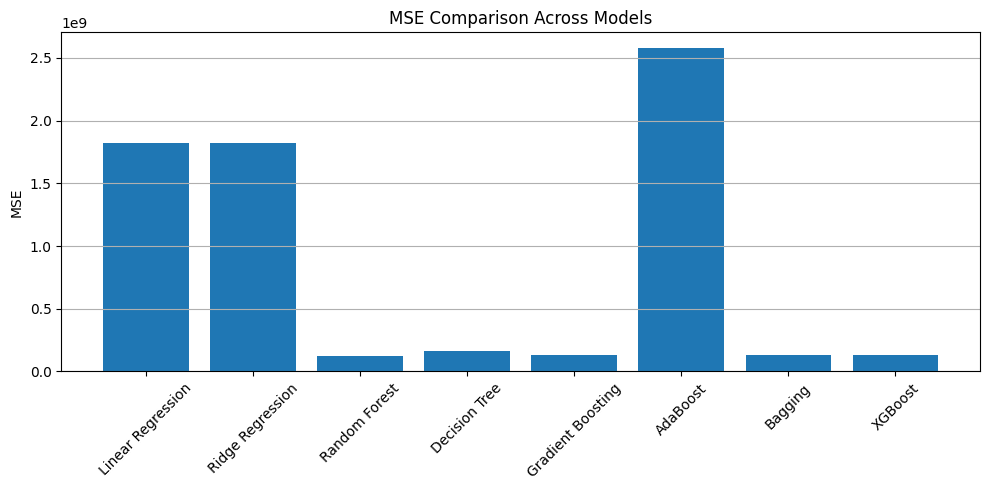

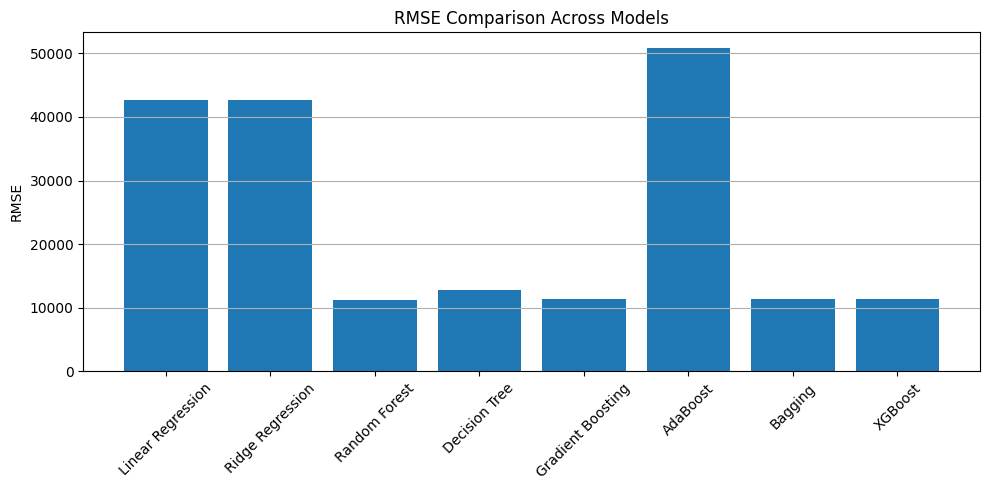

In [90]:
results = []

for name, model_dict in best_models.items():
    model = model_dict['Best Estimator']
    model.fit(X_train_agreed, y_train)
    y_pred = model.predict(X_test_agreed)

    results.append({
        'Model': name,
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    })

results_df = pd.DataFrame(results)

metrics = ['R2', 'MAE', 'MSE', 'RMSE']

for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(results_df['Model'], results_df[metric])
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [91]:
top_models = results_df.sort_values(by='R2', ascending=False).head(3)
top_models_names = top_models['Model'].tolist()
print("📌 Top 3 models for ensemble:", top_models_names)

📌 Top 3 models for ensemble: ['Random Forest', 'Bagging', 'Gradient Boosting']


In [92]:
top_estimators = [(name, best_models[name]['Best Estimator']) for name in top_models_names]

In [96]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Voting Regressor
voting_model = VotingRegressor(estimators=top_estimators)
voting_model.fit(X_train_agreed, y_train)
voting_pred = voting_model.predict(X_test_agreed)

final_model = top_estimators[0][1] 
stacking_model = StackingRegressor(estimators=top_estimators, final_estimator=final_model)
stacking_model.fit(X_train_agreed, y_train)
stacking_pred = stacking_model.predict(X_test_agreed)

# Evaluate the ensemble models
for model_name, pred in zip(['Voting Regressor', 'Stacking Regressor'], [voting_pred, stacking_pred]):
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(f"\n🔹 {model_name}")
    print(f"R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f} | MSE: {mse:.2f}")
    print("-" * 60)


🔹 Voting Regressor
R²: 0.9904 | RMSE: 10987.14 | MAE: 2165.65 | MSE: 120717181.99
------------------------------------------------------------

🔹 Stacking Regressor
R²: 0.9885 | RMSE: 11976.42 | MAE: 2094.10 | MSE: 143434745.86
------------------------------------------------------------


In [97]:
for name, pred in zip(['Voting Regressor', 'Stacking Regressor'], [voting_pred, stacking_pred]):
    results_df = pd.concat([
        results_df,
        pd.DataFrame([{
            'Model': name,
            'R2': r2_score(y_test, pred),
            'MAE': mean_absolute_error(y_test, pred),
            'MSE': mean_squared_error(y_test, pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, pred))
        }])
    ])

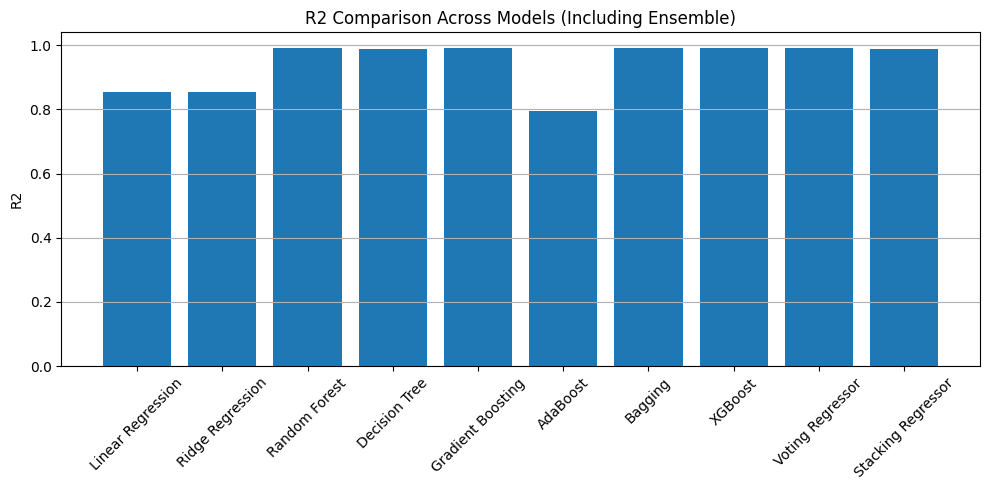

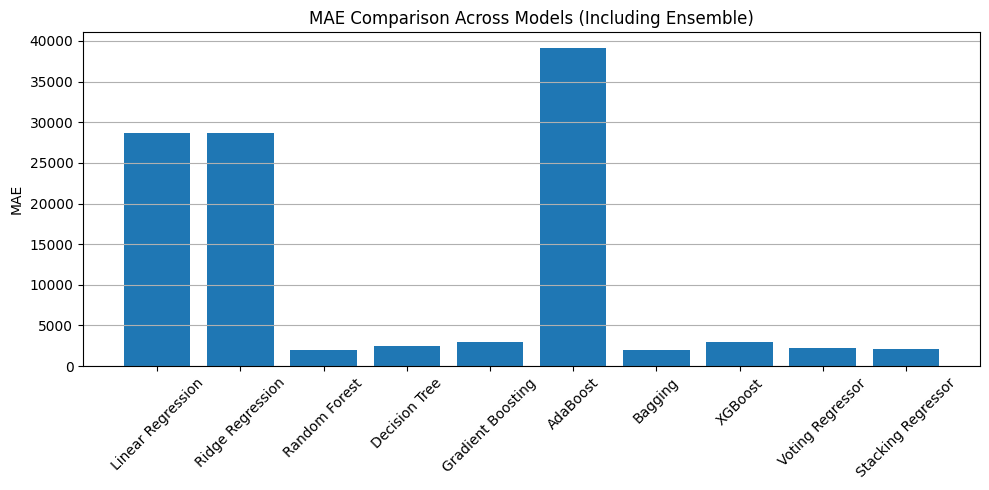

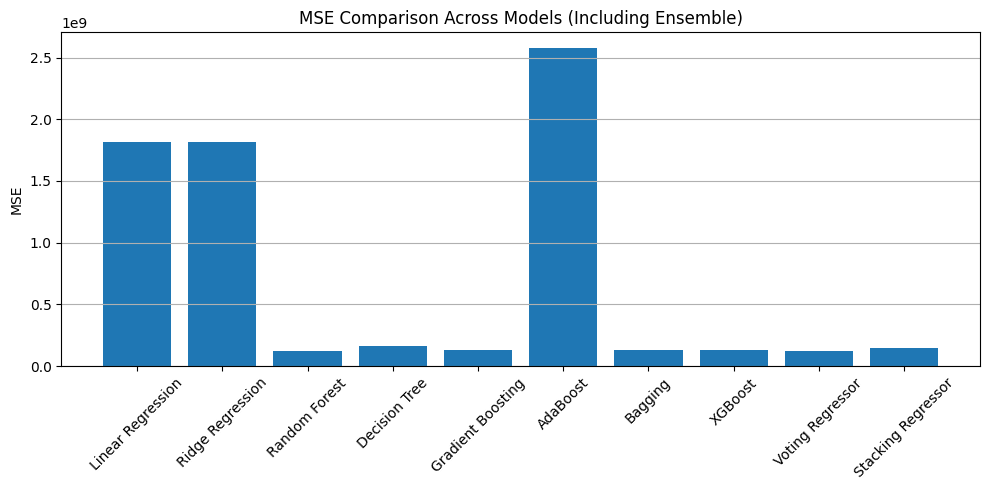

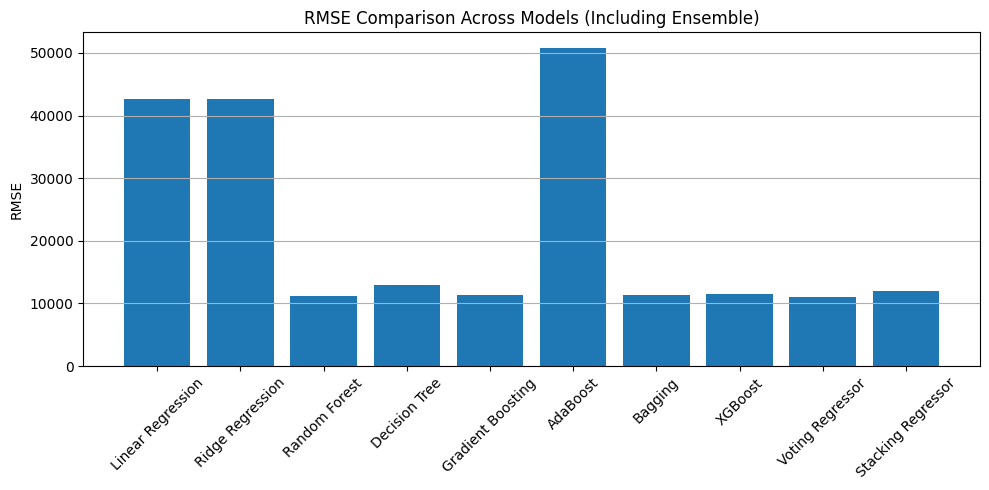

In [98]:
for metric in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar(results_df['Model'], results_df[metric])
    plt.title(f'{metric} Comparison Across Models (Including Ensemble)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()